## LOGISTIC REGRESSION:

- Logistic Regression is used for binary classification problems where we want to predict any categorical data.
- Logistic Regression uses sigmoid or logit function whose values ranges between 0 and 1.

In [100]:
# Importing the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Now we will read the heart.csv file into our notebook using pandas library:

In [113]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Understanding the dataset:

* Age: Age of the patient
* Sex: Gender of the patient --> Male: 1 and Female: 0
* cp: Chest pain type :
    - Typical angina: 1
    - Atypical angina: 2
    - Non-anginal pain: 3
    - Asymptomatic: 4
* trtbps: Resting blood pressure (in mm Hg)
* chol: Cholestoral in mg/dl which is fetched via BMI sensor
* fbs: fasting blood sugar > 120 mg/dl (1= True, 0= False)
* restecg: It is the resting electrocardiographic results
    - Normal: 0
    - Having ST-T wave abnormality: 1
    - Showing probable or definite left ventricular hypertrophy by Estes's criteria
* thalach: Maximum heart rate achieved
* exng: exercise induced angina (1=yes, 0=no)
* oldpeak: This is the previous peak
* slp: Slope
* caa: Number of major vessels (0-3)
* thall: Thal rate
* output: 0 = less chance of heart attack, 1 = more chance of heart attack



Let's understand the chest pain types:
1. Typical Angina:
- This is associated with reduced blood flow to the heart muscle (ischemia)
- It is generally referred as pressing, squeezing or tightness in the chest.

2. Atypical Angina:
- It is not associated with reduced blood flow to the heart.
- The pain may be sharp, stabbing or burning 

3. Non-anginal pain:
- This is a discomfort in chest but it is not related to reduced blood flow to the heart.
- This kind of pain is caused by gastrointestinal issues, musculoskeletal problems or respiratory issues.

4. Asymptomatic:
- This pain has no symptoms.
- Here the patient does not experience any symptoms even though they have heart diseases.

Types of cholesterol:
1. Desirable: less than 200 mg/dl
2. Borderline high: 200-239 mg/dl
3. High: 240 mg/dl and above

Further we will convert chol column into above 3 types which will make more sense rather than taking the cholesterol exact values.

## Exploratory Data Analysis:

Lets use info() and describe() function:
- info() is a method that provides a concise summary of the dataframe that includes information about data types, non-null values and memory usage.
- describe() is a method that generates descriptive statistics of the numerical columns like count, standard deviatioan, mean, minimum and maximum values, etc.

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


There are no null-values in the dataset.

In [104]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Let's convert cholesterol column into 0,1,2.
- If chol < 200 --> assign 0
- If 200 <= chol < 240 --> assign 1
- If chol >= 240 --> assign 2

In [156]:
# Here we create one function and use above conditions:

def chol_convert(value):
    if value < 200:
        return 0
    elif 200 <= value < 240:
        return 1
    else:
        return 2

Using apply() method we are replacing the cholesterol values according to above conditions.

In [134]:
df['chol']= df['chol'].apply(chol_convert)

In [135]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,1,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,2,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,1,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,1,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,2,0,1,163,1,0.6,2,0,2,1


Let's create some countplots and do analysis:

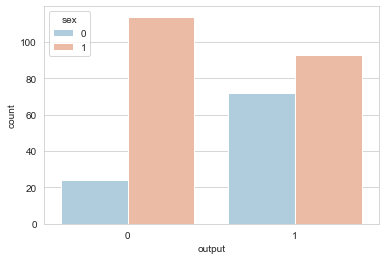

In [159]:
sns.set_style('whitegrid')
sns.countplot(x='output',data=df,palette='RdBu_r',hue='sex')
plt.show()

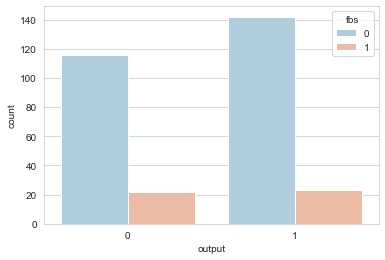

In [160]:
sns.set_style('whitegrid')
sns.countplot(x='output',data=df,palette='RdBu_r',hue='fbs')
plt.show()

- There are very less patients who has fbs > 120 mg/dl compared to who has fbs < 120 mg/dl and due to this it can impact our predictions. Hence we will remove this feature before training the model.

c:\Users\chndzzz\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


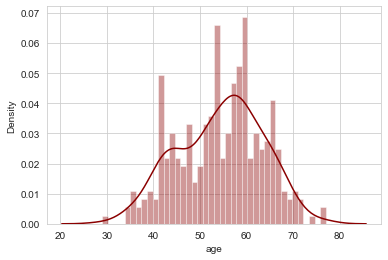

In [161]:
sns.set_style('whitegrid')
sns.distplot(df['age'],kde=True,color='darkred',bins=40)
plt.show()

- The distribution plot for age is almost follwoing normal distribution and there are very less outliers and hence this won't affect our analysis.

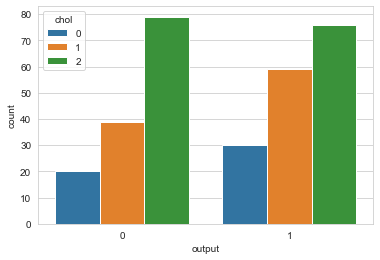

In [162]:
sns.set_style('whitegrid')
sns.countplot(x='output',data=df,hue='chol')
plt.show()

- Majority of patients do have cholesterol type-2.

In [163]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,1,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,2,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,1,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,1,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,2,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,2,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,2,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,0,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,0,0,1,115,1,1.2,1,1,3,0


Below I have written X variable 2 times in which 1 X variable has fbs feature and other X do not have fbs feature. I am removing fbs feature. If you do not remove the feature then we will get some predictions wrong. I would recommend you to experiment it.

In [165]:
# Creating X,y variables for training and testing

# X = df.iloc[:,:-1]
y= df['output']
X = df.drop(['fbs'],axis=1)

Let's split the data using train_test_split.

In [166]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=30)

Fitting the data into LogisticRegression method using liblinear solver parameter.

In [172]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

Prediction of testing data:

In [173]:
y_pred = lr.predict(X_test)

Evaluating the model:

In [174]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [175]:
print("The classification report for the model is : \n", classification_report(y_test,y_pred))
print("The confusion matrix for the model is : \n", confusion_matrix(y_test,y_pred))
print("The accuracy score for the model is : \n", accuracy_score(y_test,y_pred))

The classification report for the model is : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        37

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61

The confusion matrix for the model is : 
 [[24  0]
 [ 0 37]]
The accuracy score for the model is : 
 1.0


Since we had less data we are able to get 100% accurate prediction. But in real-time we will get large datasets and during that time we need to keep more focus on checking the outliers, irrelevant data, etc. and may be we might need to change the model also depending on the situation.